In [1]:
# Import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [2]:
attr = pd.read_csv('celeba-dataset/list_attr_celeba.csv')
samples = attr.sample(frac=1, random_state=42).reset_index(drop=True)
samples.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,093242.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,-1,-1,-1,-1,1
1,121414.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
2,010625.jpg,1,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,082524.jpg,-1,1,1,1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
4,073193.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,-1,-1,-1,-1


In [3]:
subset_attr = ['Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair']
attr_s = round(attr[subset_attr].describe(),2) 
attr_s

,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Black_Hair,Blond_Hair,Brown_Hair
count,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00,202599.00
mean,-0.47,0.03,-0.59,-0.96,-0.70,-0.52,-0.70,-0.59
std,0.88,1.00,0.81,0.30,0.72,0.85,0.71,0.81
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
75%,1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


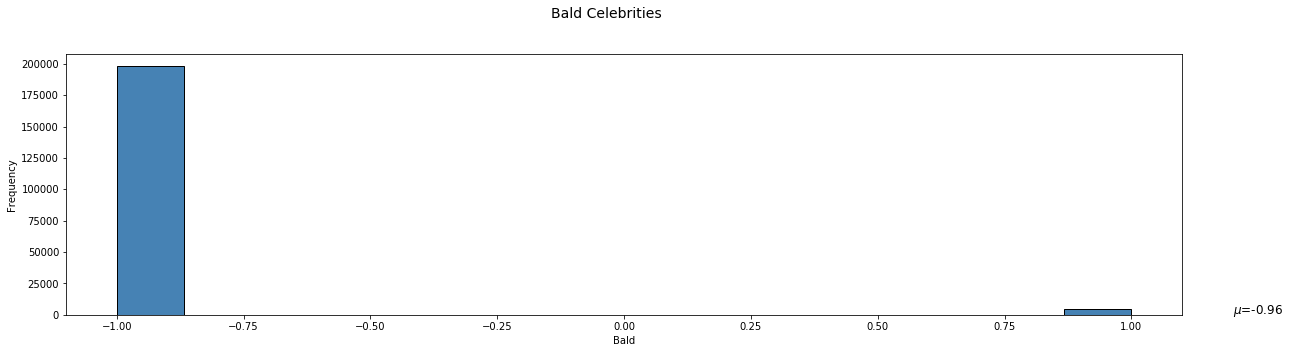

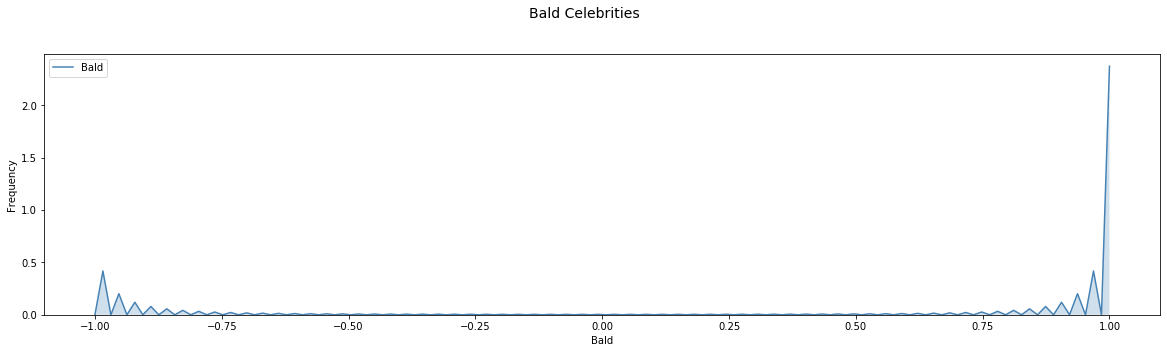

In [4]:
fig = plt.figure(figsize = (20,5))
title = fig.suptitle("Bald Celebrities", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Bald")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(samples['Bald'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(samples['Bald'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (20, 5))
title = fig.suptitle("Bald Celebrities", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Bald")
ax1.set_ylabel("Frequency") 
sns.kdeplot(samples['Bald'], ax=ax1, shade=True, color='steelblue')

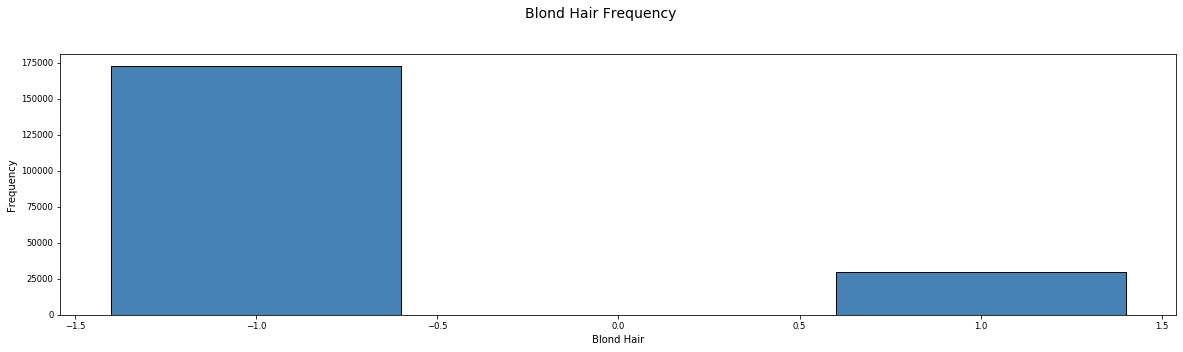

In [5]:
fig = plt.figure(figsize = (20, 5))
title = fig.suptitle("Blond Hair Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Blond Hair")
ax.set_ylabel("Frequency") 
w_q = samples['Blond_Hair'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

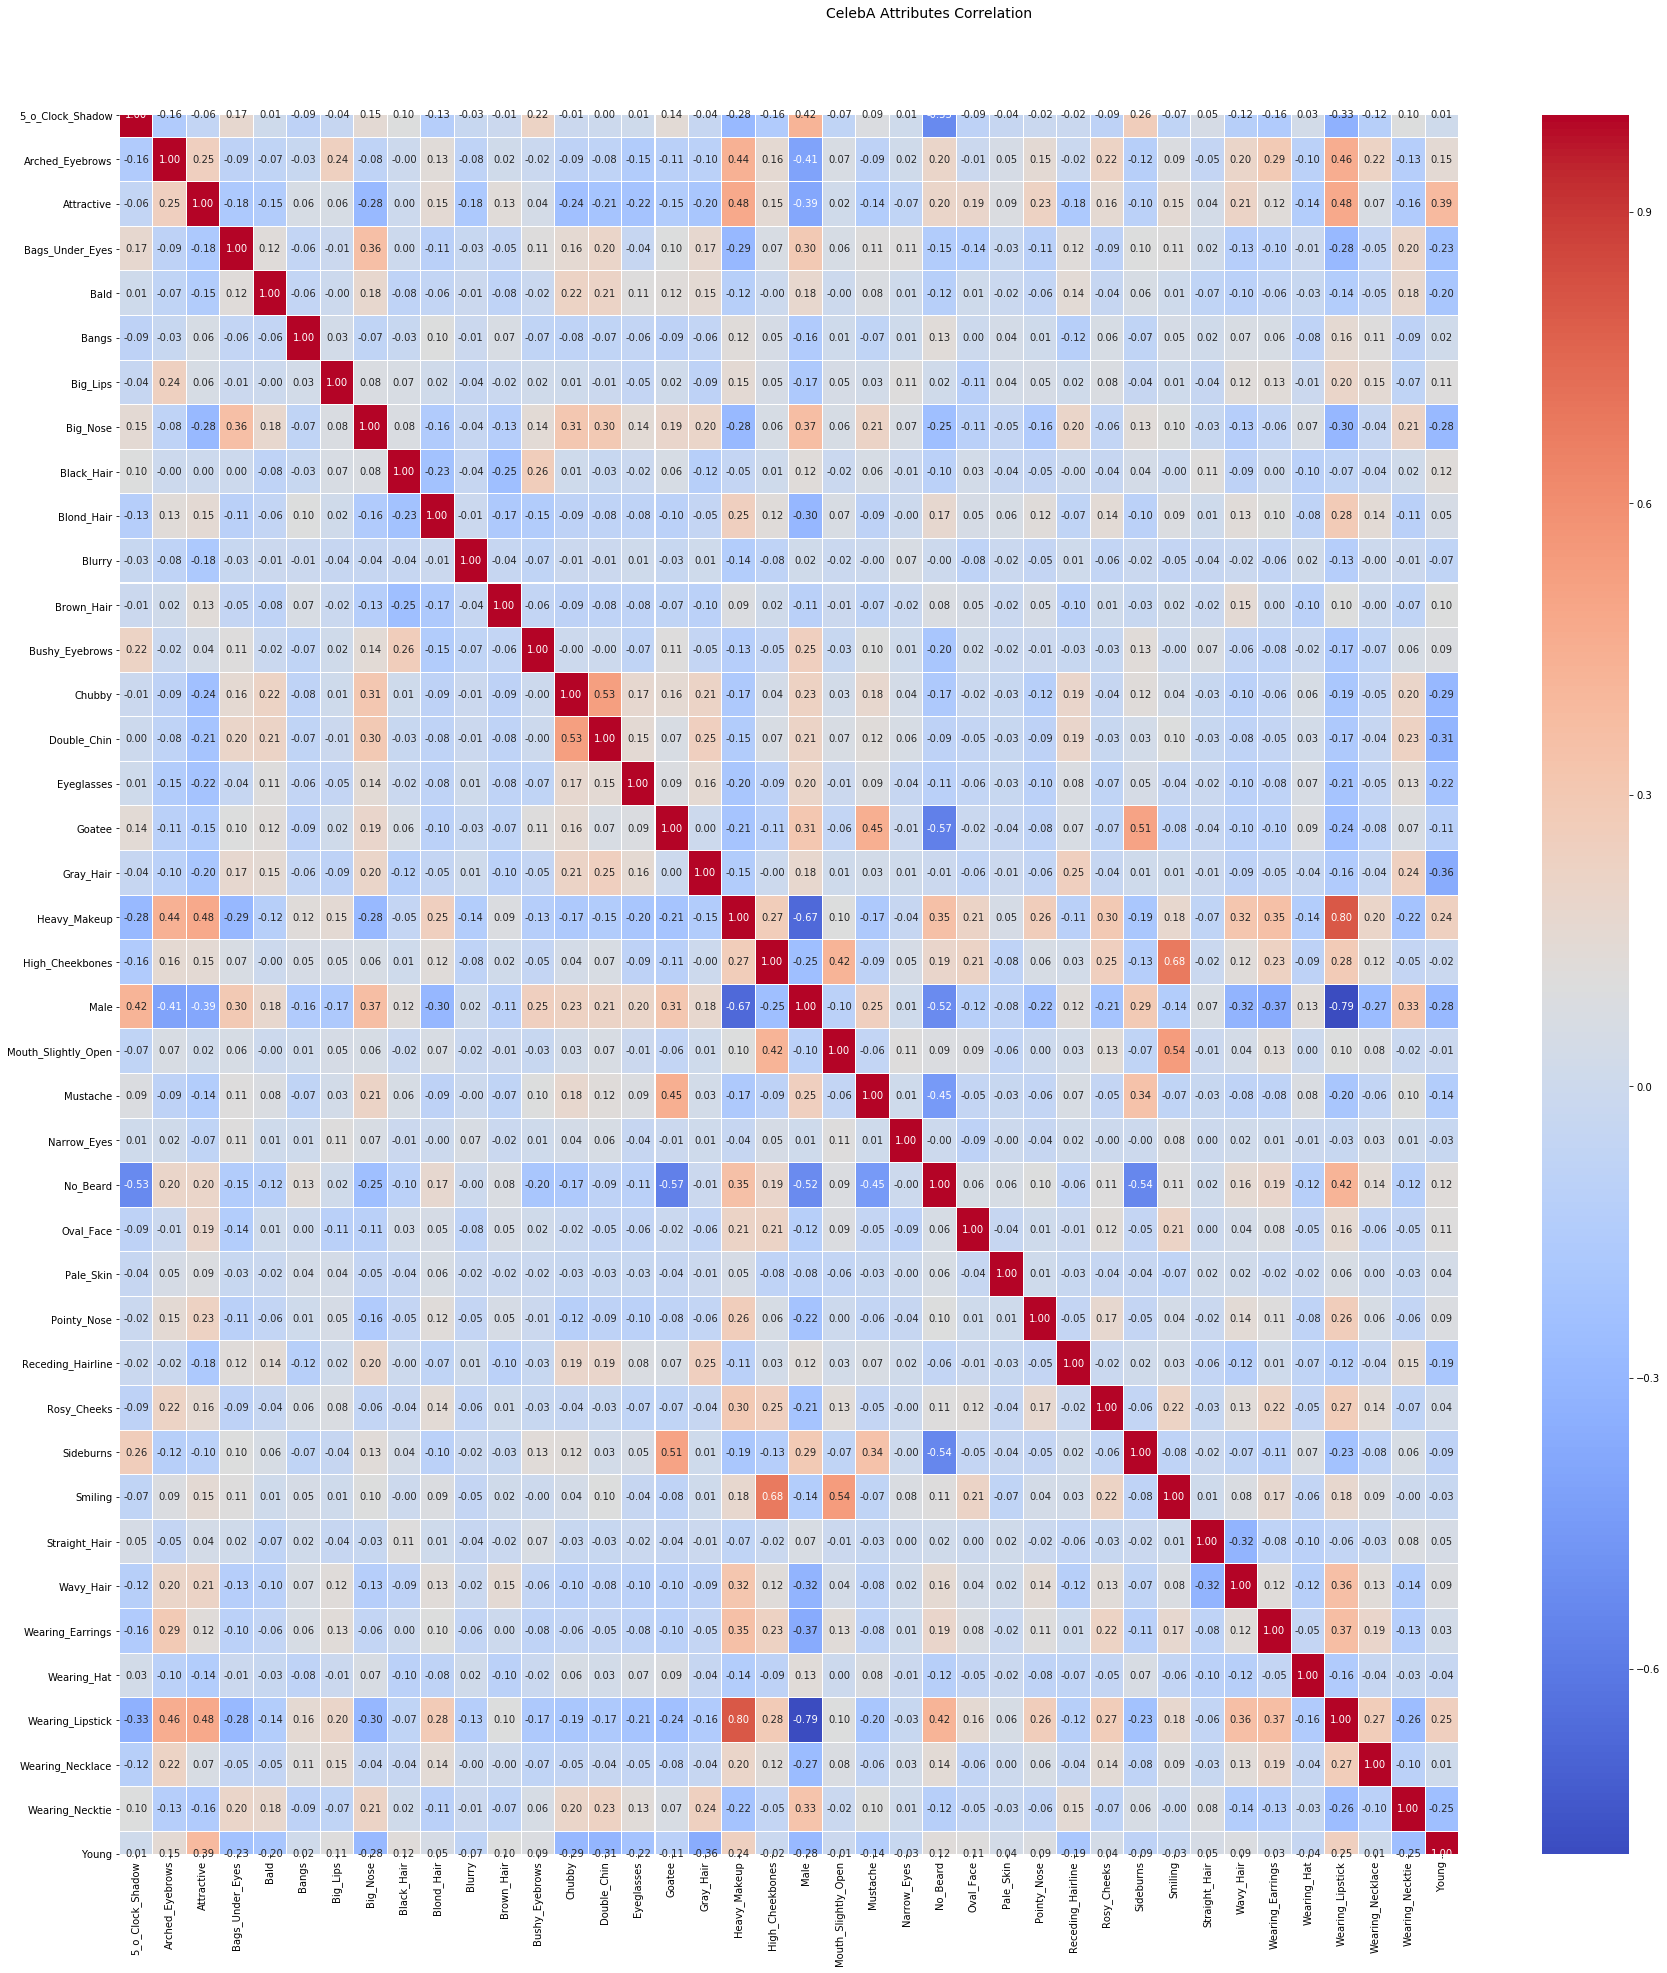

In [6]:
f, ax = plt.subplots(figsize=(30, 30))
corr = samples.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('CelebA Attributes Correlation', fontsize=14)

/Users/kc.kasaraneni/anaconda3/envs/sjsu/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


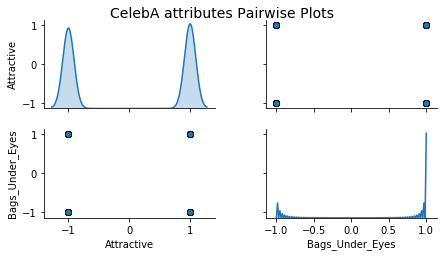

In [7]:
cols = ['Attractive', 'Bags_Under_Eyes'] 
pp = sns.pairplot(samples[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('CelebA attributes Pairwise Plots', fontsize=14)

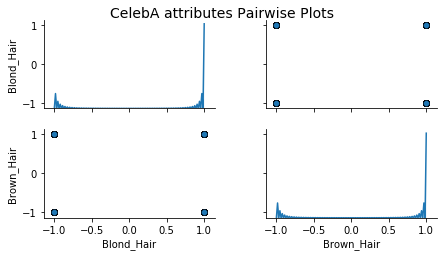

In [8]:
cols = ['Blond_Hair', 'Brown_Hair']
pp = sns.pairplot(samples[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('CelebA attributes Pairwise Plots', fontsize=14)